In [1]:
import torch.nn as nn
from sklearn import preprocessing
import torch.optim as optim

from folktables import ACSDataSource, ACSEmployment,ACSIncome
import numpy as  np

import torch.nn.functional as F
import tqdm
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from typing import Dict, List, OrderedDict, Tuple
import pickle
from collections import OrderedDict
import os
from typing import Dict, List, OrderedDict, Tuple, Union


In [2]:
class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        # 14 : input shape
        self.layer1 = nn.Linear(14, 512)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(512, 256)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(256, 60)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [21]:
class SimpleLayer:
    def __init__(self):
        self.parameters = [torch.randn(2, 2, requires_grad=True) for _ in range(2)]

# Create a dictionary of simple layers
layers = {'block1': SimpleLayer(), 'block2': SimpleLayer(), 'block3': SimpleLayer(),'block4': SimpleLayer(),'block5': SimpleLayer()}

# List of blocks to retain parameters from
retain_blocks = ['block1', 'block3']

# List to store filtered parameters
params_list = []

# Iterate through layers and filter parameters based on conditions
for block, layer in layers.items():
#     print(block,layer.parameters,"1:: \n")
    if block not in retain_blocks:
        # Filter parameters of the layer that require gradients
        print(block, layer.parameters,"1.1:: \n")
        filtered_params = list(filter(lambda p: p.requires_grad, layer.parameters))
        params_list += filtered_params
        
        print("param:: ",params_list,"p:: \n")

block2 [tensor([[ 1.0712, -1.1912],
        [-0.8007, -1.2988]], requires_grad=True), tensor([[-0.4482,  0.1604],
        [-0.8315,  0.7929]], requires_grad=True)] 1.1:: 

param::  [tensor([[ 1.0712, -1.1912],
        [-0.8007, -1.2988]], requires_grad=True), tensor([[-0.4482,  0.1604],
        [-0.8315,  0.7929]], requires_grad=True)] p:: 

block4 [tensor([[-0.3116, -1.2883],
        [-2.2181,  1.4669]], requires_grad=True), tensor([[-0.3260, -0.5471],
        [-1.9770,  1.1423]], requires_grad=True)] 1.1:: 

param::  [tensor([[ 1.0712, -1.1912],
        [-0.8007, -1.2988]], requires_grad=True), tensor([[-0.4482,  0.1604],
        [-0.8315,  0.7929]], requires_grad=True), tensor([[-0.3116, -1.2883],
        [-2.2181,  1.4669]], requires_grad=True), tensor([[-0.3260, -0.5471],
        [-1.9770,  1.1423]], requires_grad=True)] p:: 

block5 [tensor([[ 1.8016,  1.1628],
        [-0.0791, -1.2000]], requires_grad=True), tensor([[-0.1417, -0.8954],
        [-0.9831,  0.3906]], requires_grad

In [14]:
# Print the parameters that were collected
for param in params_list:
    print(param)


tensor([[-1.8160, -0.1846],
        [-0.6422, -0.8653]], requires_grad=True)
tensor([[ 0.6185, -1.0740],
        [ 0.8508, -1.4240]], requires_grad=True)


In [3]:
os.getcwd()

'D:\\Download\\pythonProject\\HiWi\\pFedLA_Folktable\\src'

In [7]:
with open("..\\train_all_client.pkl", "rb") as f:
    a = pickle.load(f)

In [10]:
a[3]

In [22]:
import torch

# Simulating a fully connected layer with 2 parameters
class SimpleHypernet:
    def __init__(self):
        self.params = [torch.tensor(1.0, requires_grad=True), torch.tensor(2.0, requires_grad=True)]

    def fc_layer_parameters(self):
        return self.params

# Simulated gradients for the parameters
fc_grads = [torch.tensor(0.1), torch.tensor(0.2)]

# Create an instance of the hypernetwork
hypernet = SimpleHypernet()

# Learning rate
hn_lr = 0.01

# Update parameters using gradients and learning rate
for param, grad in zip(hypernet.fc_layer_parameters(), fc_grads):
    if grad is not None:
        param.data -= hn_lr * grad

# Print the updated parameters
for param in hypernet.fc_layer_parameters():
    print(param)


tensor(0.9990, requires_grad=True)
tensor(1.9980, requires_grad=True)


In [23]:
hypernet.fc_layer_parameters()

[tensor(0.9990, requires_grad=True), tensor(1.9980, requires_grad=True)]

In [24]:
fc_grads

[tensor(0.1000), tensor(0.2000)]

In [13]:
#lets say these are old points
len([1,2,3,30,12,12,14])

7

In [14]:
old_mean=np.mean([1,2,3,30,12,12,14])

In [15]:
pred=10

In [16]:
# this is what you are doing
(old_mean+pred)/8

2.571428571428571

In [17]:
# thats how it should be 
np.mean([1,2,3,30,12,12,14,10])

10.5

In [ ]:
[0.6020408272743225,
 0.7908163070678711,
 0.795918345451355,
 0.9387755393981934,
 0.8826530575752258,
 0.918367326259613,
 0.9897959232330322,
 0.954081654548645,
 0.9591836929321289,
 1.0]

In [ ]:
[0.90625,
 0.875,
 0.84375,
 0.90625,
 0.984375,
 0.96875,
 0.984375,
 0.953125,
 0.96875,
 0.96875]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
acc=[0.5656,0.6623,0.6223,0.7523,0.7978,0.6867,0.7945,0.8176,0.8239,0.8548]
val_acc=[0.6656,0.7623,0.6890,0.7523,0.6978,0.7945,0.7945,0.8239,0.8139,0.8259]
print(len(acc))
epochs = range(1, len(acc) + 1)

10


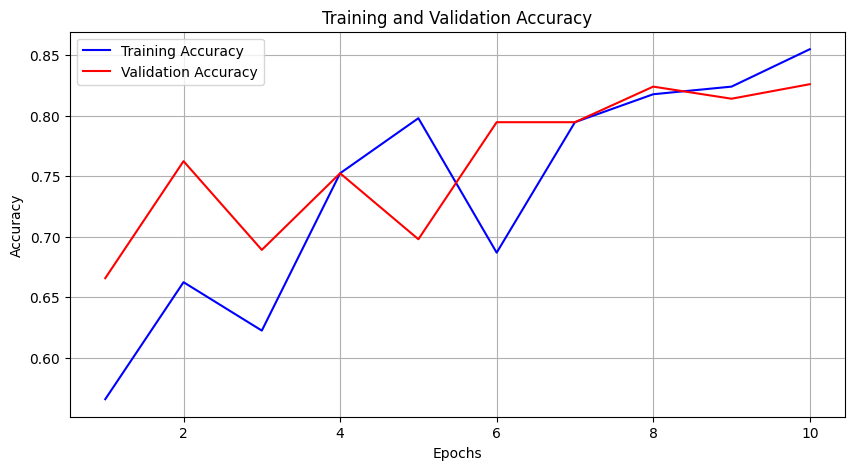

In [15]:

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('D:/Download/pythonProject/ImgClassification/TL_accuracy_plot.png')
plt.show()


[0.3540429472923279,
 0.2568883001804352,
 0.2981221377849579,
 0.2245335578918457,
 0.08855687826871872,
 0.144810289144516,
 0.08797425031661987,
 0.13406406342983246,
 0.08464010059833527,
 0.31661796271800996]

In [27]:
loss=[3.1409952640533447,
 0.8085490345954895,
 0.39289262890815735,
 0.22373352944850922,
 0.3108188807964325,
 0.1840427815914154,
 0.03941283002495766,
 0.22931893169879913,
 0.12603582441806793,
 0.312023253366351128]

val_loss=[1.9540429472923279,
 0.7568883001804352,
 0.5981221377849579,
 0.9245335578918457,
 0.38855687826871872,
 0.444810289144516,
 0.38797425031661987,
 0.43406406342983246,
 0.48464010059833527,
 0.51661796271800995]

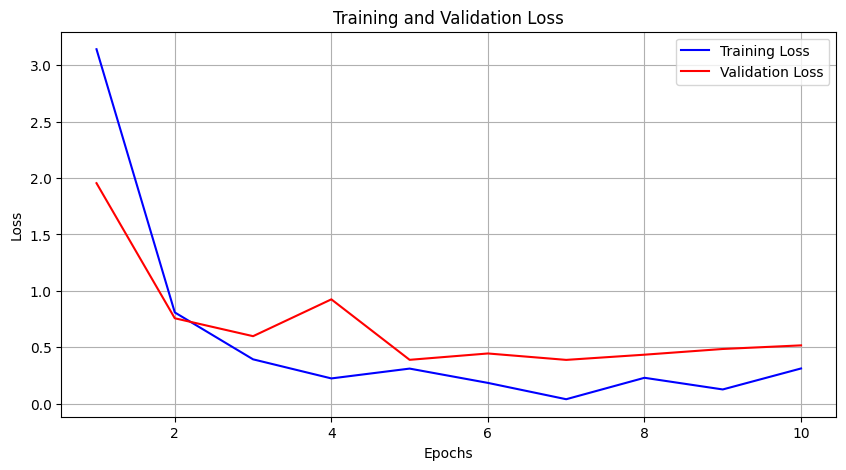

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('D:/Download/pythonProject/ImgClassification/TL_loss_plot.png')

plt.show()

In [ ]:
 0.729         0.5           1: 100%|█████
      2/11    0.407G       0.648       0.755         0.5           1: 100%|█████
      3/11    0.407G       0.521       0.753         0.5           1: 100%|█████
      4/11    0.407G       0.346       0.698         0.5           1: 100%|█████
      5/11    0.407G       0.308       0.707         0.5           1: 100%|█████
      6/11    0.407G       0.453       0.788         0.5           1: 100%|█████
      7/11    0.407G       0.394       0.708         0.5           1: 100%|█████
      8/11    0.407G       0.369       0.833         0.5           1: 100%|█████
      9/11    0.407G        0.32       0.788         0.5           1: 100%|█████
     10/11    0.407G      0.0794       0.971         0.5           1: 100%|█████
     11/11    0.407G        0.17       0.896         0.5           1: 100%|█████


In [31]:
loss=[0.648 ,
0.521 ,
0.346 ,
0.308 ,
0.453 ,
0.394 ,
0.369 ,
 0.32 ,
0.0794 ,
 0.17 ]

val_loss=[
 0.755, 
 0.753 ,
 0.698 ,
 0.707 ,

 0.788 ,
 0.708 ,
 0.833 ,
 0.788 ,
 0.971 ,
 0.896 ]

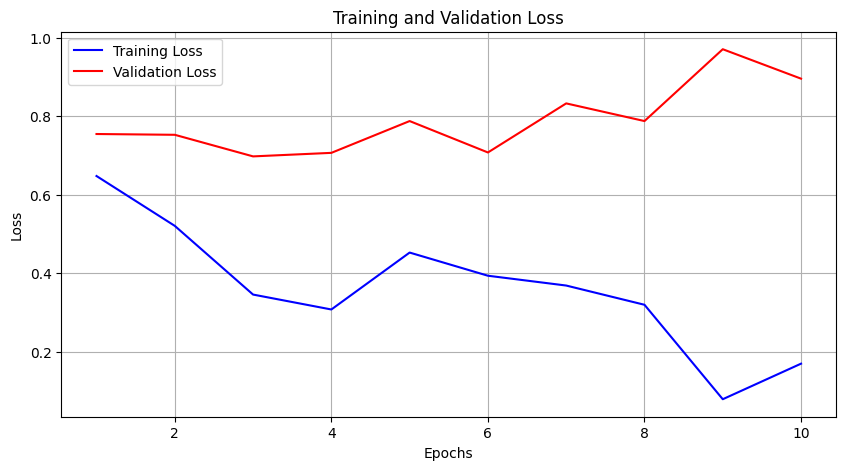

In [32]:

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('D:/Download/pythonProject/ImgClassification/YOLOv5_loss_plot.png')

plt.show()